## Diabetes prediction

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


## Load Data

In [3]:
df = pd.read_csv("datasheet/diabetes_prediction_dataset.csv")
df.shape # (rows,colums)

(100000, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.head(10)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
5,Female,20.0,0,0,never,27.32,6.6,85,0
6,Female,44.0,0,0,never,19.31,6.5,200,1
7,Female,79.0,0,0,No Info,23.86,5.7,85,0
8,Male,42.0,0,0,never,33.64,4.8,145,0
9,Female,32.0,0,0,never,27.32,5.0,100,0


In [6]:
# Let's find how many of each class there
df["diabetes"].value_counts()


diabetes
0    91500
1     8500
Name: count, dtype: int64

<Axes: xlabel='diabetes'>

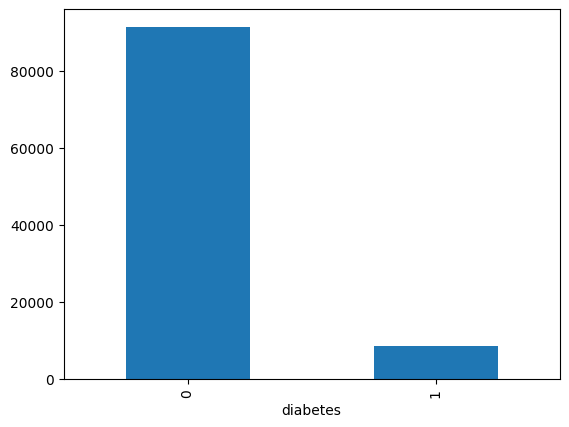

In [7]:
df["diabetes"].value_counts().plot(kind='bar')

In [8]:
# Are there any missing values
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [9]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [10]:
df["gender"].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

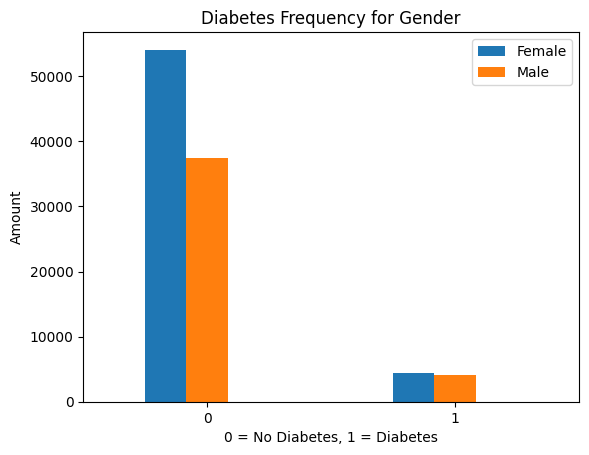

In [11]:
# Create a plot of crosstab
pd.crosstab(df["diabetes"],df["gender"]).plot(kind='bar')
plt.title("Diabetes Frequency for Gender")
plt.xlabel("0 = No Diabetes, 1 = Diabetes")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

<Axes: ylabel='Frequency'>

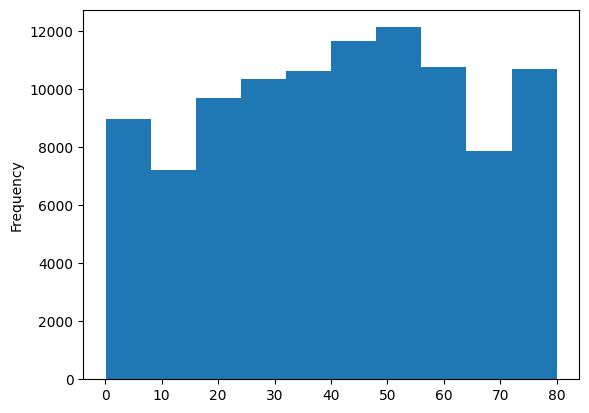

In [12]:
# Check the distribution of the age columns with a histogram
df["age"].plot.hist()

### Label Encording

In [13]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
cat_feature = ["gender", "smoking_history"]

for feature in cat_feature:
    encode = LabelEncoder()
    encoded_data = encode.fit_transform(df[feature])
    df[feature] = encoded_data

In [16]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


### Spilt dataset

In [17]:
# Split data into x and y
X = df.drop("diabetes",axis=1)
y = df["diabetes"]

### Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
standerd_X = scaler.fit_transform(X)
X = pd.DataFrame(standerd_X, columns=X.columns)


In [19]:
X.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-0.841047,1.692704,-0.284439,4.936379,0.963327,-0.321056,1.001706,0.047704
1,-0.841047,0.538006,-0.284439,-0.202578,-1.153468,-0.000116,1.001706,-1.426210
2,1.187234,-0.616691,-0.284439,-0.202578,0.963327,-0.000116,0.161108,0.489878
3,-0.841047,-0.261399,-0.284439,-0.202578,-0.624269,-0.583232,-0.492690,0.416183
4,1.187234,1.515058,3.515687,4.936379,-0.624269,-1.081970,-0.679490,0.416183



### SMOTE

In [20]:

from imblearn.over_sampling import SMOTE


In [21]:
smote = SMOTE(sampling_strategy="auto", random_state=32)
X_resampled, y_resampled = smote.fit_resample(X,y)

x_resampled_df = pd.DataFrame(X_resampled, columns = X.columns)
y_resampled_df = pd.Series(y_resampled, name=y.name)

In [23]:
y_resampled_df.value_counts()

diabetes
0    91500
1    91500
Name: count, dtype: int64

In [24]:
# Split data into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x_resampled_df,y_resampled_df,test_size=0.2, random_state=32)

In [25]:
x_train

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
148488,1.187234,1.219140,-0.284439,-0.202578,0.963327,0.201495,1.188505,2.012923
139547,1.187234,0.299085,-0.284439,-0.202578,-0.624269,2.240268,0.607840,-0.177959
171131,1.187234,0.267375,3.515687,-0.202578,0.741725,1.576918,0.441307,3.486837
119897,1.187234,1.123749,-0.284439,-0.202578,0.434128,-0.314595,0.534707,3.931711
157329,-0.841047,0.595284,3.515687,-0.202578,0.434128,2.816820,1.194518,0.538218
...,...,...,...,...,...,...,...,...
60284,1.187234,-1.798035,-0.284439,-0.202578,-1.153468,-1.294424,0.628107,-1.426210
75062,1.187234,-0.039342,-0.284439,-0.202578,-1.153468,2.273588,1.375305,3.486837
130949,1.187234,0.143537,-0.284439,-0.202578,0.963327,2.238723,3.243300,-0.060648
108075,1.187234,0.769415,3.515687,-0.202578,0.434128,-0.000116,1.584221,0.416183


In [26]:
y_train


148488    1
139547    1
171131    1
119897    1
157329    1
         ..
60284     0
75062     1
130949    1
108075    1
10967     0
Name: diabetes, Length: 146400, dtype: int64

### Model

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
model_rf = RandomForestClassifier()

model_rf.fit(x_train,y_train)

RandomForestClassifier()

### Evaluation

In [32]:
y_preds = model_rf.predict(x_test)

In [34]:
y_preds

array([0, 1, 1, ..., 1, 0, 1], dtype=int64)

In [48]:
accuracy = accuracy_score(y_test, y_preds)
print(f"Accuracy: {accuracy * 100: .2f}%")

Accuracy:  97.89%


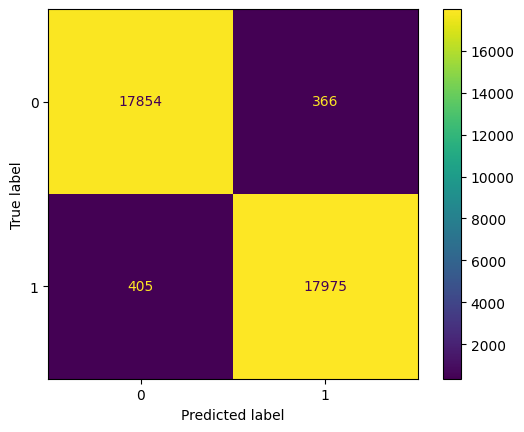

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_preds)
dis = ConfusionMatrixDisplay(confusion_matrix=cm)
dis.plot()

In [50]:
## Classification Report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18220
           1       0.98      0.98      0.98     18380

    accuracy                           0.98     36600
   macro avg       0.98      0.98      0.98     36600
weighted avg       0.98      0.98      0.98     36600



In [52]:
import pickle

In [53]:
with open("model/model_1.pkl", "wb") as f:
    pickle.dump(model_rf, f)

In [56]:
## Load model

with open("model/model_1.pkl", "rb") as f:
    model = pickle.load(f)

gender	age	hypertension	heart_disease	smoking_history	bmi	HbA1c_level	blood_glucose_level

In [95]:
## Example

test_1 = {
    "gender": 0,
    "age" : 55,
    "hypertension" : 0,
    "heart_disease" : 0,
    "smoking_history": 1,
    "bmi": 28.5,
    "HbA1c_level": 9.0,
    "blood_glucose_level": 60
}

test_1 = pd.DataFrame([test_1])

In [96]:
test_scaled = scaler.transform(test_1)
test_1_df = pd.DataFrame(test_scaled, columns=test_1.columns)

In [97]:
test_1_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,-0.841047,0.582418,-0.284439,-0.202578,-0.624269,0.177682,3.2433,-1.917515


In [99]:
result = model.predict(test_1_df)[0]

if result == 1:
    print("Diabetes")
else:
    print("No Diabetes")

No Diabetes
